In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer



from xgboost import XGBClassifier

## Importing Data

In [2]:
try:
    df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
except:
    df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Checking imbalance in our data

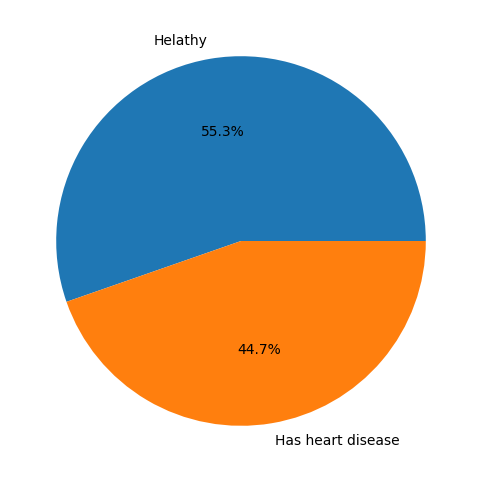

In [7]:
labels = ['Helathy','Has heart disease']
data_to_imbalance = df['HeartDisease'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(x=data_to_imbalance, labels = labels,autopct='%1.1f%%')
plt.show()

### Data preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
print(f"Values in Sex: {df['Sex'].unique()}")
print(f"Values in ChestPainType: {df['ChestPainType'].unique()}")
print(f"Values in RestingECG: {df['RestingECG'].unique()}")
print(f"Values in ExerciseAngina: {df['ExerciseAngina'].unique()}")
print(f"Values in ST_Slope: {df['ST_Slope'].unique()}")


Values in Sex: ['M' 'F']
Values in ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Values in RestingECG: ['Normal' 'ST' 'LVH']
Values in ExerciseAngina: ['N' 'Y']
Values in ST_Slope: ['Up' 'Flat' 'Down']


In [10]:
df['Sex'].replace({'M': 1 , 'F':0},inplace=True)
df['ExerciseAngina'].replace({'Y': 1 , 'N':0},inplace=True)

le = LabelEncoder()
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


<Axes: >

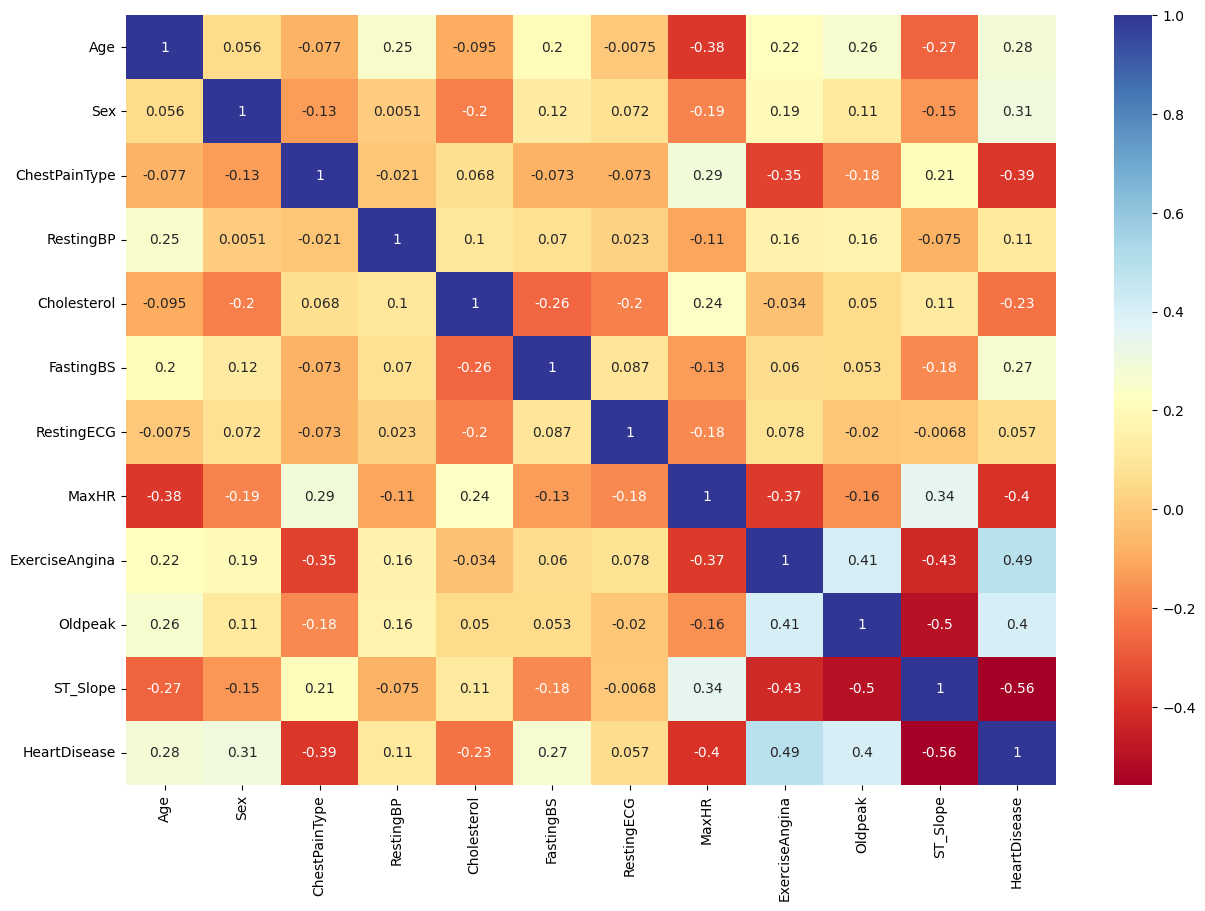

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

In [12]:
y = df.pop('HeartDisease')

In [13]:
norm = Normalizer()
norm.fit(df)
df_scaled_by_normalize = pd.DataFrame(norm.transform(df) , columns=df.columns)
df_scaled_by_normalize

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.109145,0.002729,0.002729,0.382006,0.788570,0.000000,0.002729,0.469322,0.000000,0.000000,0.005457
1,0.168322,0.000000,0.006870,0.549624,0.618327,0.000000,0.003435,0.535883,0.000000,0.003435,0.003435
2,0.112602,0.003043,0.003043,0.395629,0.861253,0.000000,0.006087,0.298243,0.000000,0.000000,0.006087
3,0.170979,0.000000,0.000000,0.491563,0.762279,0.000000,0.003562,0.384702,0.003562,0.005343,0.003562
4,0.192937,0.003573,0.007146,0.535936,0.696717,0.000000,0.003573,0.435895,0.000000,0.000000,0.007146
...,...,...,...,...,...,...,...,...,...,...,...
913,0.141415,0.003143,0.009428,0.345682,0.829637,0.000000,0.003143,0.414819,0.000000,0.003771,0.003143
914,0.236738,0.003481,0.000000,0.501327,0.671917,0.003481,0.003481,0.490882,0.000000,0.011837,0.003481
915,0.253545,0.004448,0.000000,0.578261,0.582709,0.000000,0.004448,0.511539,0.004448,0.005338,0.004448
916,0.174973,0.000000,0.003070,0.399060,0.724448,0.000000,0.000000,0.534127,0.000000,0.000000,0.003070


In [14]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [23]:
X = df_scaled_by_normalize

In [24]:
x_train, x_test , y_train, y_test = train_test_split(X1, y ,test_size=0.2,shuffle=True)

In [25]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)

0.8967391304347826

In [26]:
import pickle

In [27]:
pickle.dump(xgb,open('model.pkl','wb'))